In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [2]:
import numpy as np
from qiskit import *
%matplotlib inline

In [3]:
#initialization
q = QuantumRegister(5, 'q')
circ = QuantumCircuit(q)

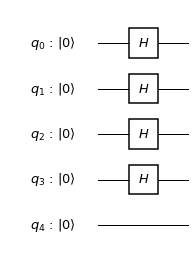

In [51]:
#superposition
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])
circ.draw()

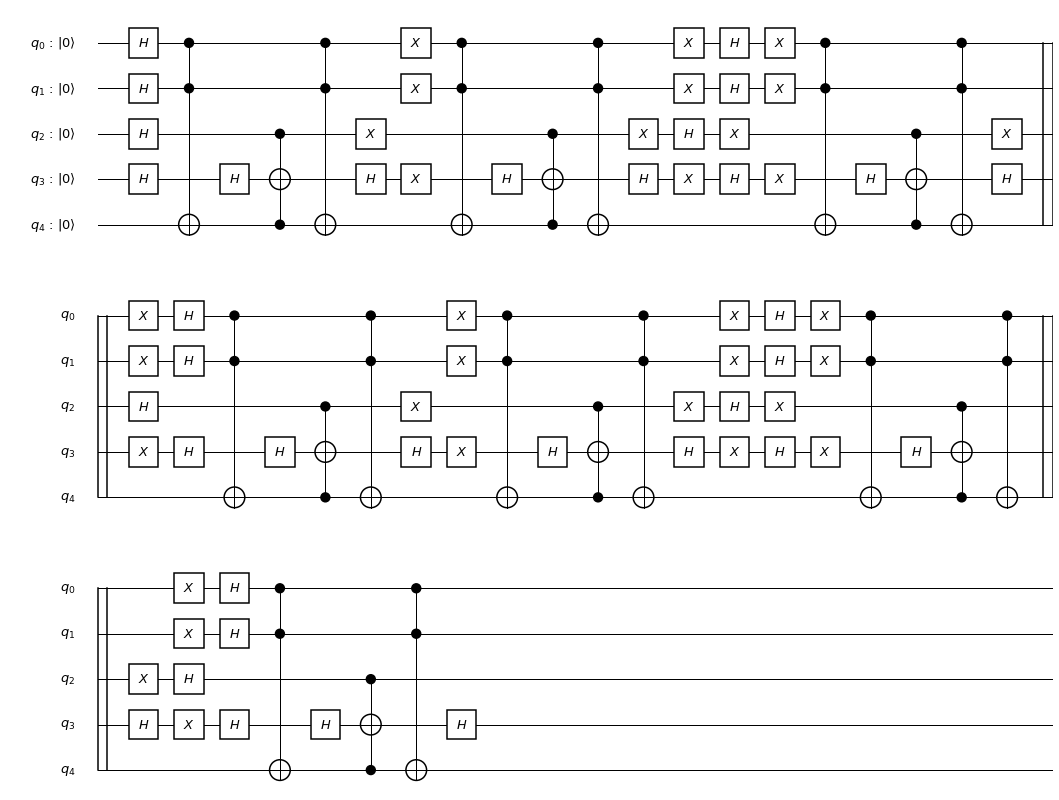

In [61]:
#phase inverstion of |1111>
circ.h(q[3])
circ.ccx(q[0], q[1], q[4])
circ.ccx(q[2], q[4], q[3])
circ.ccx(q[0], q[1], q[4])
circ.h(q[3])

circ.draw()

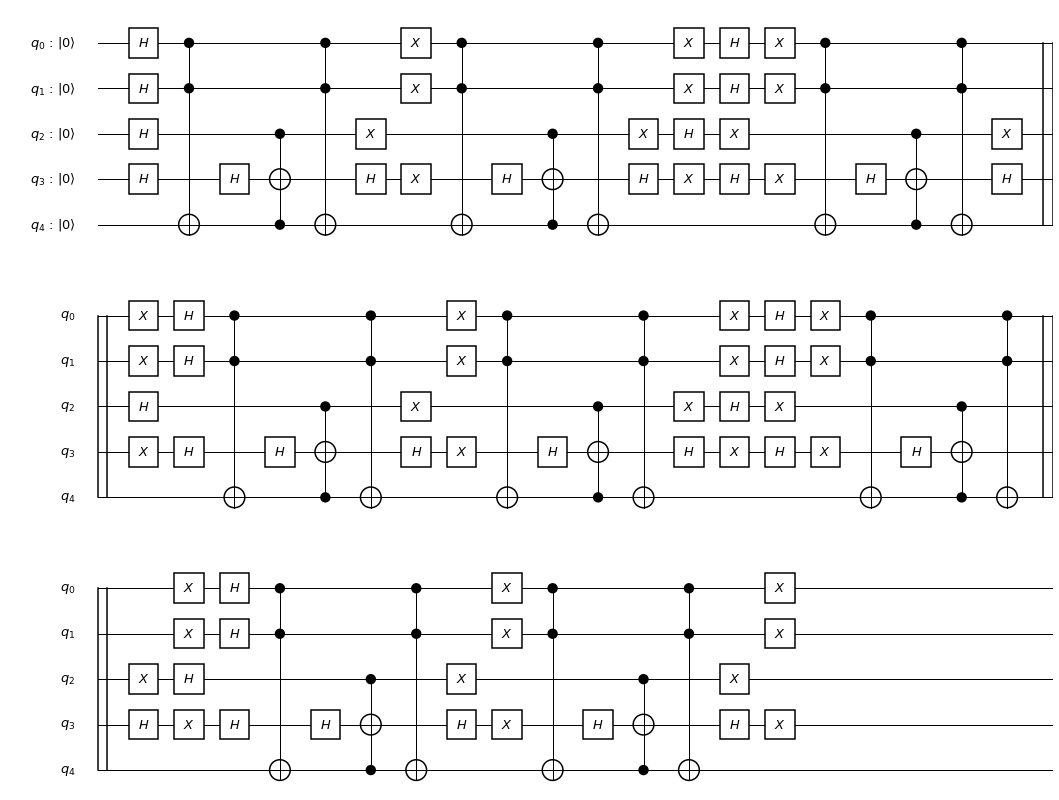

In [62]:
#phase inverstion of |0000>
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.h(q[3])
circ.ccx(q[0], q[1], q[4])
circ.ccx(q[2], q[4], q[3])
circ.ccx(q[0], q[1], q[4])
circ.h(q[3])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])

circ.draw()

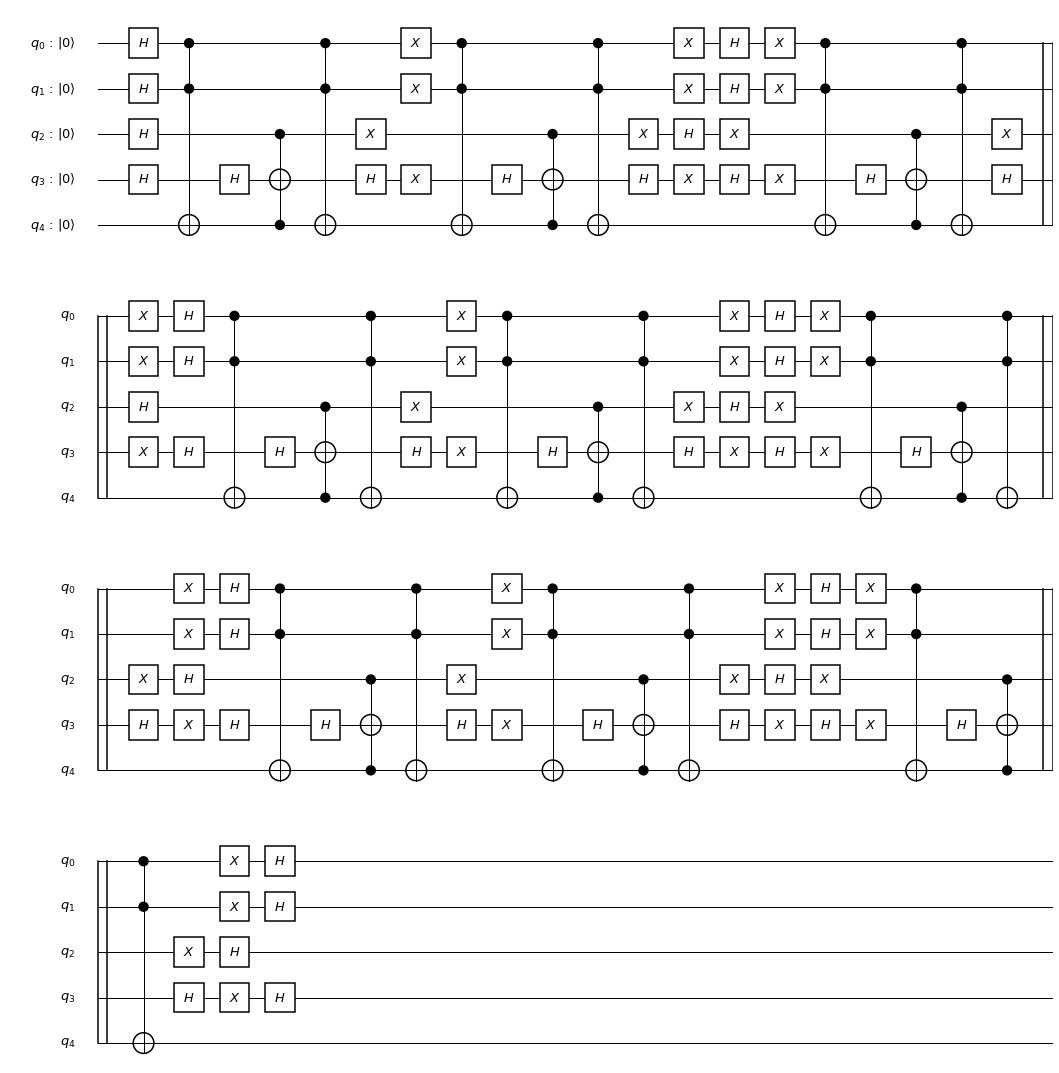

In [63]:
#Diffusion Operator
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.h(q[3])
circ.ccx(q[0], q[1], q[4])
circ.ccx(q[2], q[4], q[3])
circ.ccx(q[0], q[1], q[4])
circ.h(q[3])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])
circ.draw()


In [24]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[ 0.5+0.j  0.5+0.j -0.5+0.j  0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]
 [-0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]
 [-0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]]


In [4]:
# Import Aer
from qiskit import BasicAer

# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]
